## Implement SLR to __Predict Baseball Team Wins from Run Differential__


Can you predict a baseball team's win total if you know their run differential?

The Major League Baseball (MLB) season schedule generally consists of __162 games__ for each of the 30 teams in the __American League (AL)__ and __National League (NL)__. A __run (R)__ is considered $1$ point in baseball and __run differential (RD)__ is the difference between the number of runs a team scores and the number of runs it gave up.

__Steps:__
1. Exploring the dataset and preprocessing
2. Modeling and fitting
3. Prediction and Model Performance

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background (for readability of visualizations)
sns.set_style("whitegrid")

## 1- Start with reading our data and do some EDA

Describe and clean your dataset here. Before making any changes to your dataset, it's a good idea to create a copy so that the original data remains untouched in case something goes wrong.



In [3]:
# create a copy of the "Salary_Data.csv"
df = pd.read_csv('Salary_Data.csv')

### 1.1 Check for potential (linear) relationship between variables by plotting your data.

Explian here why we can use simple linear regression here.

In [ ]:
# We are only looking at years of experience and the salary

### 1.2 Train-Test Split

We did not talk about train-test split in class. We learn about it here. To check our predictive model's accuracy, we split our data into training ($\{(X_{\text{train}}, y_{\text{train}})\}$)and testing subsets ($\{(X_{\text{test}}, y_{\text{test}})\}$).  One reson for this is training data may overestimate a model's effectiveness, the test data serves as a sanity check, to see if the model's performance aligns with expectations. Very similar to what we do in school: a lot homework and assignment to train you and at the end there will be a test to evaluate your perfomance.


In [14]:
## We use sample(frac=0.75, random_state=440) to make a random sample
## frac: to set aside 75% for training
## random_state=440 allows you to reproduce the same train test split each time you run the code.

# Assuming df is your DataFrame

train_df = df.sample(frac=0.75, random_state=440)

# The remaining 75% will be used for training
test_df = df.drop(train_df.index)


### 2- Modeling and fitting

You can use the formula given in lecture (previous notebooks) or build a model using `sklearn` which is an open source python machine learning library.

__Steps:__

1. import the model from sklearn,
2. make a model object,
3. fit the object,
4. predict

In [15]:
# First we import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [16]:
## Now we make a LinearRegression object
slr = LinearRegression(copy_X = True)

The parameter `copy_X` is set to `True`. This makes a copy of the original input $X$ to ensure that it is not modified during the fitting process.

To learn more about the `LinearRegression` object read the documentation here: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>.

In [19]:
## Now we fit the model. Replace X and y with what you have in the following
#slr.fit(X, y)
slr.fit(train_df[['YearsExperience']], train_df['Salary'])

LinearRegression()

In [20]:
## Print the coefficients
beta_1_hat = slr.coef_[0]
beta_0_hat = slr.intercept_

print("beta_1_hat is", beta_1_hat)
print("beta_0_hat is", beta_0_hat)

beta_1_hat is 9343.023590209616
beta_0_hat is 25606.569293904176


Now produce a scatter plot of data points along with the fitted SLR line ($y = \beta_0 + \beta_1 x $). In your opinion, does this line describe your dataset?

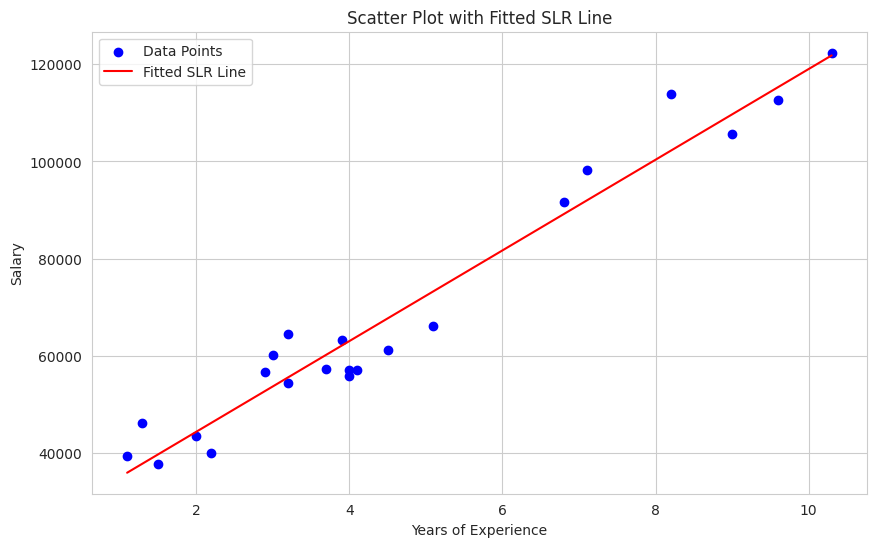

In [21]:
# prompt: create a scatter plot of data points along with the fitted SRL line

import matplotlib.pyplot as plt
import numpy as np
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(train_df['YearsExperience'], train_df['Salary'], color='blue', label='Data Points')

# Generate points for the fitted line
x_line = np.linspace(min(train_df['YearsExperience']), max(train_df['YearsExperience']), 100)
y_line = beta_0_hat + beta_1_hat * x_line

plt.plot(x_line, y_line, color='red', label='Fitted SLR Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot with Fitted SLR Line')
plt.legend()
plt.show()


### Model Performance:

We measure the performance by looking at its predictions. The basic idea is we compute the regression line on train dataset and use it to predeict the values on the test dataset. A large gap between the training and testing MSE indicates high variance (__overfitting__), while a small gap may suggest high bias (__underfitting__).

__Steps__

1-find MSE on training dataset

2-find MSE on testing dataset

3- Is your model overfitting or underfitting or working well?

In [22]:
## Here you calculate the MSE on the training data
## (how well the model performs on seen data)
from sklearn.metrics import mean_squared_error

In [23]:
# prompt: calculate the MSE on the training data

y_pred_train = slr.predict(train_df[['YearsExperience']])
mse_train = mean_squared_error(train_df['Salary'], y_pred_train)

print(f"Mean Squared Error (MSE) on training data: {mse_train}")


Mean Squared Error (MSE) on training data: 32331431.56048533


In [12]:
## Here calculate the MSE on the test data
## (how well the model performs on seen data)
# Its good


1- How do you interpret you MSE?

2- Is it acceptable?

3- Let's look at error again. The predictions tells you the pattern that the model has captured, and the residuals tell you what the model has missed. Plot the residuals. Did you successfully remove the strong linear pattern?

4- How do you interpret the residuals?

5- How can you use your model to predict? Explain with an example.  

In [24]:
# prompt: find the rmse

import numpy as np
# Calculate RMSE on the test data
y_pred_test = slr.predict(test_df[['YearsExperience']])
mse_test = mean_squared_error(test_df['Salary'], y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")


Root Mean Squared Error (RMSE) on test data: 5551.529577814896


### Notes on Overfitting and Underfitting


1. **Overfitting**:
   - If the **MSE on the training dataset** is much **lower** than the **MSE on the testing dataset**, this suggests **overfitting**.
   - The model fits the training data very well but struggles to generalize to new, unseen data (test set), which leads to a large gap in MSE.
   - Overfitting happens when the model has high variance, capturing noise and irrelevant details in the training data.

2. **Underfitting**:
   - If **both the training and testing MSE are high**, this indicates **underfitting**.
   - The model is too simple and unable to capture the underlying patterns in the data, which leads to poor performance on both the training and test datasets.
   - This occurs when the model has high bias and lacks the complexity needed to learn from the data.

### Summary:
- **Large gap** between training and testing MSE → **Overfitting** (high variance).
- **High MSE** on both training and testing sets, with **similar values** → **Underfitting** (high bias).

You want to minimize the gap while keeping both errors as low as possible, which would indicate a well-balanced model.

In [25]:
# prompt: we have overshot the rmse, fix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ... (rest of your existing code)

# Calculate RMSE on the test data
y_pred_test = slr.predict(test_df[['YearsExperience']])
mse_test = mean_squared_error(test_df['Salary'], y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")

# Analyze and address potential overfitting/underfitting
# If rmse_test is too high, consider the following:

#1. Feature Engineering: Explore adding more relevant features or transforming existing ones.
#2. Regularization (L1/L2): Introduce regularization to penalize complex models.
#3. Model Selection: Try different regression models (e.g., Ridge, Lasso, or polynomial regression)
#4. Hyperparameter Tuning: Use cross-validation to find optimal hyperparameter settings for your model.

#Example of adding polynomial features (if appropriate):
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)  # Example degree, tune this.
# X_train_poly = poly.fit_transform(train_df[['YearsExperience']])
# X_test_poly = poly.transform(test_df[['YearsExperience']]) # use transform only on the test set
# slr_poly = LinearRegression()
# slr_poly.fit(X_train_poly, train_df['Salary'])
# y_pred_test_poly = slr_poly.predict(X_test_poly)
# rmse_test_poly = np.sqrt(mean_squared_error(test_df['Salary'], y_pred_test_poly))

# print(f"RMSE (Polynomial): {rmse_test_poly}")

#Example of regularization (L2 - Ridge Regression)
# from sklearn.linear_model import Ridge
# ridge = Ridge(alpha=1.0) #tune alpha
# ridge.fit(train_df[['YearsExperience']], train_df['Salary'])
# y_pred_test_ridge = ridge.predict(test_df[['YearsExperience']])
# rmse_test_ridge = np.sqrt(mean_squared_error(test_df['Salary'], y_pred_test_ridge))

# print(f"RMSE (Ridge): {rmse_test_ridge}")


Root Mean Squared Error (RMSE) on test data: 5551.529577814896
